In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Prediction ##

In [3]:
movies = Table.read_table('movies.csv')
movies.show(11)

Year,Title,Distributor,Domestic Gross,Budget,Category,Yanay Watched,Katherine Watched
2021,A Quiet Place Part II*,Paramount,136,61,Horror,0,0
2021,Godzilla vs. Kong*,Warner Bros.,100,177.5,Other,1,0
2021,Cruella*,Disney,71,150,Other,0,0
2021,F9*,Universal,70,200,Other,0,0
2021,The Conjuring: The Devil Made Me Do It*,Warner Bros.,59,39,Horror,0,0
2021,Raya and the Last Dragon*,Disney,54,100,Animated,1,0
2021,Tom & Jerry*,Warner Bros.,46,79,Other,0,0
2021,Mortal Kombat*,Warner Bros.,42,55,Other,1,0
2021,Peter Rabbit 2: The Runaway*,Sony Pictures,29,107.9,Other,0,0
2021,Wrath of Man*,MGM,27,40,Other,0,0


In [4]:
cash = movies.select("Budget", "Domestic Gross")
cash

Budget,Domestic Gross
61,136
177.5,100
150,71
200,70
39,59
100,54
79,46
55,42
107.9,29
40,27


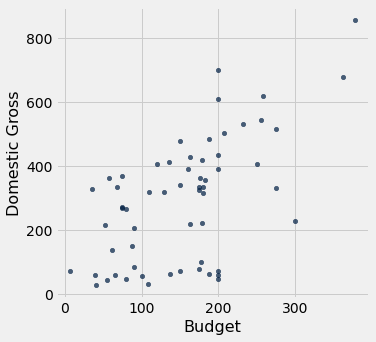

In [5]:
cash.scatter('Budget')

In [6]:
def predict_gross(b):
    """Return a prediction of the domestic gross for a movie 
    with a budget of b
    
    The prediction is the average domestic gross of the movies
    whose budget is in the range b plus or minus $20 million dollars.
    """
    
    close_points = cash.where('Budget', are.between(b-20, b+20))
    return np.mean(close_points.column("Domestic Gross"))   

In [7]:
cash_with_predictions = cash.with_column(
    'Prediction', cash.apply(predict_gross, 'Budget')
    )

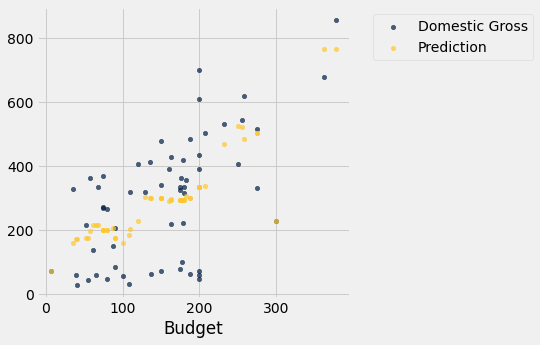

In [8]:
cash_with_predictions.scatter('Budget')

In [9]:
# Questions?
# Slides

## Association ##

In [10]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [11]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


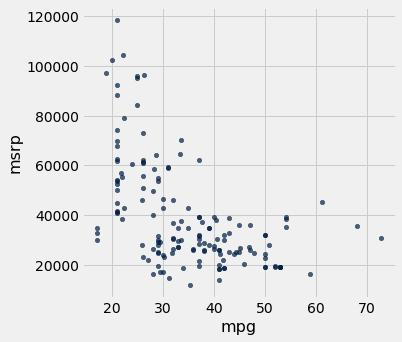

In [12]:
hybrid.scatter('mpg', 'msrp')

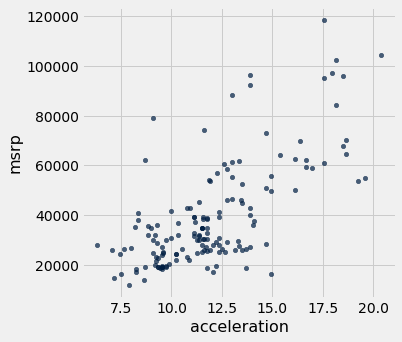

In [13]:
hybrid.scatter('acceleration', 'msrp')

In [14]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

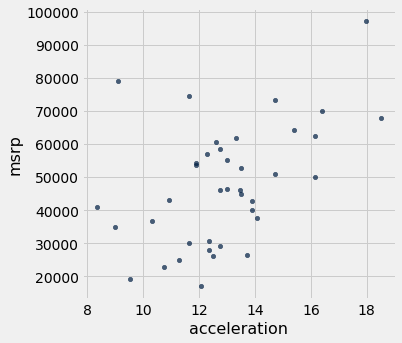

In [15]:
suv.scatter('acceleration', 'msrp')

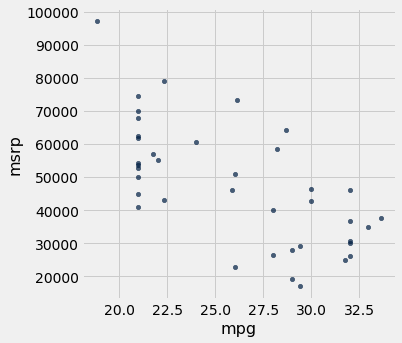

In [16]:
suv.scatter('mpg', 'msrp')

In [17]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

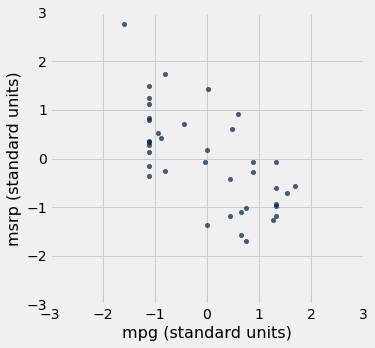

In [18]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

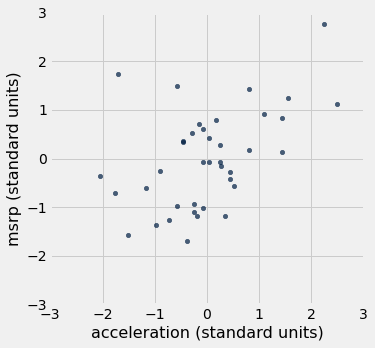

In [19]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [20]:
# Slides

## Correlation ##

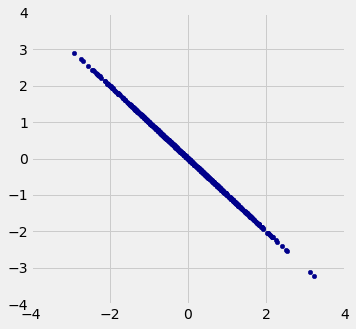

In [21]:
r_scatter(-1) # diff values (neg, pos, small, large 0)

In [22]:
# Questions?
# Slides

## Calculating $r$ ##

In [23]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


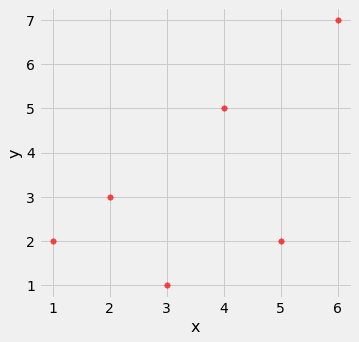

In [24]:
t.scatter('x', 'y', s=30, color='red') # what correlation value do you think this should have?

In [25]:
# Step 1: convert x and y into standard units
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [26]:
# Step 2: multiply the. standard. units together
t = t.with_columns('product of standard units', t.column(2) * t.column(3))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [27]:
# Step 3: r is the average of the products of the standard units

r = np.average(t.column(4))

r

0.6174163971897709

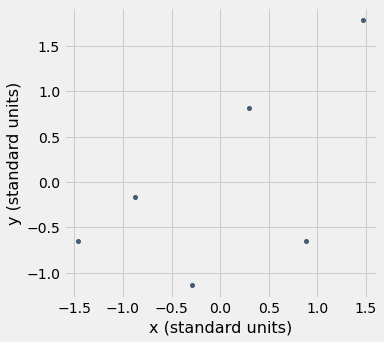

In [28]:
t.scatter("x (standard units)", "y (standard units)")

In [29]:
### That's a weird formula, why does it make sense?

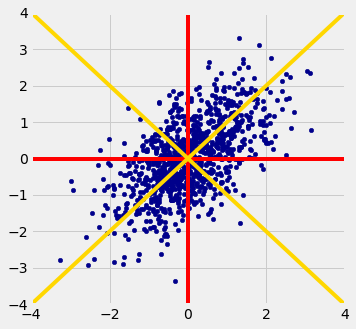

In [30]:
r_scatter(0.6)
plots.plot([-4,4], [0,0], c='r');
plots.plot([0,0], [-4,4], c='r');
plots.plot([-4, 4], [-4, 4], c='gold');
plots.plot([-4, 4], [4, -4],  c='gold');

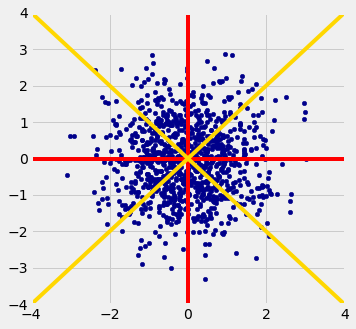

In [31]:
r_scatter(0)
plots.plot([-4,4], [0,0], c='r');
plots.plot([0,0], [-4,4], c='r');
plots.plot([-4, 4], [-4, 4], c='gold');
plots.plot([-4, 4], [4, -4],  c='gold');

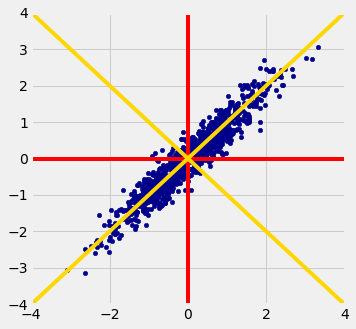

In [32]:
r_scatter(0.95)
plots.plot([-4,4], [0,0], c='r');
plots.plot([0,0], [-4,4], c='r');
plots.plot([-4, 4], [-4, 4], c='gold');
plots.plot([-4, 4], [4, -4],  c='gold');

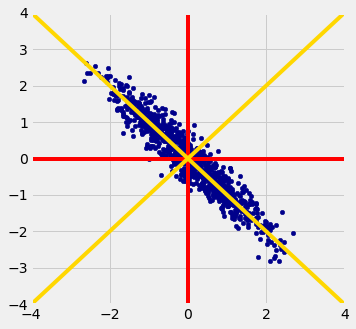

In [33]:
r_scatter(-.95)
plots.plot([-4,4], [0,0], c='r');
plots.plot([0,0], [-4,4], c='r');
plots.plot([-4, 4], [-4, 4], c='gold');
plots.plot([-4, 4], [4, -4],  c='gold');

In [34]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

0.6174163971897709

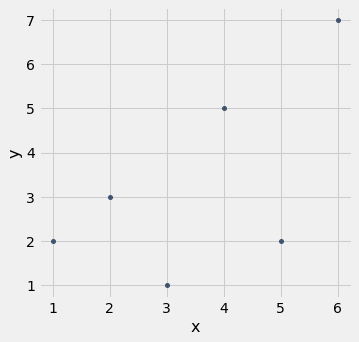

In [35]:
t.scatter('x', 'y')
correlation(t, 'x', 'y')

-0.6667143635709919

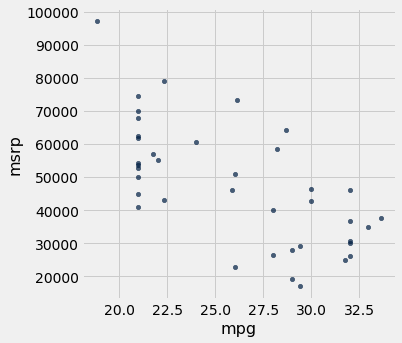

In [36]:
suv.scatter('mpg', 'msrp')
correlation(suv, 'mpg', 'msrp')

0.48699799279959155

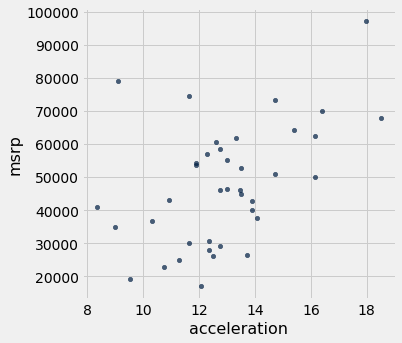

In [37]:
suv.scatter('acceleration', 'msrp')
correlation(suv, 'acceleration', 'msrp')

In [38]:
# Questions?
# Continue

### Switching Axes ###

In [39]:
correlation(t, 'x', 'y')

0.6174163971897709

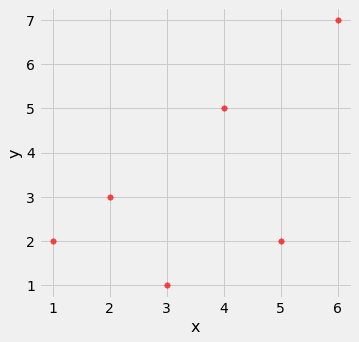

In [40]:
t.scatter('x', 'y', s=30, color='red')

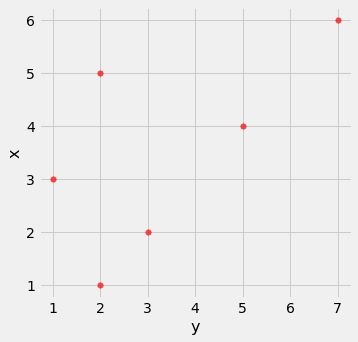

In [41]:
t.scatter('y', 'x', s=30, color='red')

In [42]:
correlation(t, 'y', 'x') 

0.6174163971897709

In [43]:
correlation(t, 'x', 'y') 

0.6174163971897709

In [44]:
# Questions?
# Slides

### Nonlinearity ###

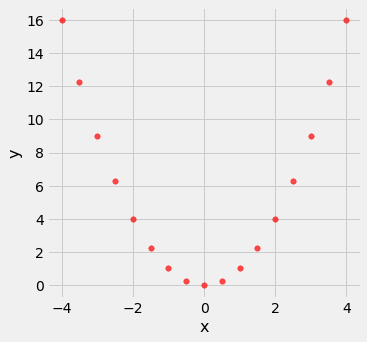

In [45]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [46]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

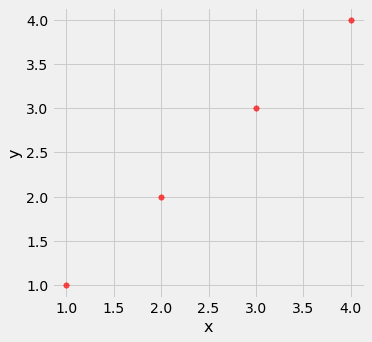

In [47]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [48]:
correlation(line, 'x', 'y')

1.0

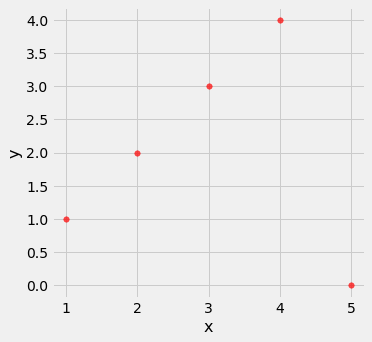

In [49]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [50]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations ###

In [51]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


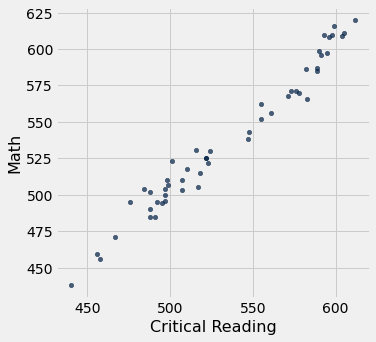

In [52]:
sat2014.scatter('Critical Reading', 'Math')

In [53]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434